<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio EDA y Gestión de Nulos

AutoRenew, una empresa líder en la venta de coches de segunda mano, te ha contratado para desarrollar un modelo predictivo que estime el precio de los vehículos usados. Este modelo ayudará a la empresa a mejorar sus estrategias de ventas, marketing y optimización del inventario. Para ello, cuentas con un conjunto de datos que contiene información detallada sobre diversas características de los coches usados. Sin embargo, como es común en conjuntos de datos reales, encontrarás valores nulos y necesitarás realizar un análisis exploratorio para identificar patrones, correlaciones y posibles anomalías.

 En este laboratorio, tu tarea es realizar un análisis exploratorio de los datos (EDA) y gestionar los valores nulos que encuentres. Este es solo el primer paso de un proyecto que se desarrollará durante toda la semana, en el que usarás este mismo conjunto de datos para practicar diferentes fases del preprocesamiento.

**Columnas del conjunto de datos:**

- **dateCrawled**: Fecha y hora en que se recolectaron los datos del coche.

- **name**: Nombre del anuncio, generalmente incluye la marca y el modelo del coche.

- **seller**: Tipo de vendedor (particular o concesionario).

- **offerType**: Tipo de oferta (venta o subasta).

- **price**: Precio del coche en la moneda local.

- **abtest**: Campo utilizado para pruebas A/B, indicando diferentes versiones del sitio web o anuncio.

- **vehicleType**: Tipo de vehículo (sedán, SUV, hatchback, etc.).

- **yearOfRegistration**: Año de registro del coche.

- **gearbox**: Tipo de caja de cambios (manual o automática).

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **model**: Modelo específico del coche.

- **kilometer**: Kilometraje total del coche.

- **monthOfRegistration**: Mes de registro del coche.

- **fuelType**: Tipo de combustible (gasolina, diésel, eléctrico, etc.).

- **brand**: Marca del coche.

- **notRepairedDamage**: Indica si el coche tiene daños no reparados.

- **dateCreated**: Fecha de creación del anuncio.

- **nrOfPictures**: Número de fotos en el anuncio.

- **postalCode**: Código postal de la ubicación del coche.

- **lastSeen**: Última fecha y hora en que el anuncio fue visto.

**Instrucciones:**

1. **Análisis Exploratorio de Datos (EDA):** Explora el conjunto de datos para familiarizarte con las diferentes características de los coches. Utiliza gráficos y estadísticas descriptivas para identificar patrones, tendencias y posibles anomalías.
   
2. **Gestión de Valores Nulos:** Identifica las columnas que contienen valores nulos y aplica las técnicas adecuadas para manejarlos. Esto podría incluir la imputación de valores, eliminación de filas o columnas, o cualquier otra estrategia que consideres apropiada.

**Nota:** Este laboratorio es el primer paso de una serie de actividades que realizarás esta semana utilizando el mismo conjunto de datos. Asegúrate de documentar bien tu trabajo, ya que lo utilizarás como base para los siguientes ejercicios.


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Importaciones
import sys
sys.path.append("../")
from src import soporte_preprocesamiento as sc

In [2]:
# cargamos el conjunto de datos con el que vamos a trabajar y mostramos 5 filas aleatorias
df = pd.read_csv("../data/autorenew.csv", index_col = 0) 
df.sample(5)

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
dateCrawled,,,,,,,,,,,,,,,,,,,
2016-04-03 13:56:45,OPEL_ZAFIRA_B_MIT_7_SITZEN___SCHWARZ___KLIMA__...,private,offer,2390,control,suv,2005,manually,148.0,zafira,150000,7,petrol,opel,no,2016-04-03 00:00:00,0,64521,2016-04-03 13:56:45
2016-03-24 18:46:26,Opel_Astra_1.6_Klima,private,offer,1590,test,NaN,2002,manually,87.0,NaN,150000,9,petrol,opel,no,2016-03-24 00:00:00,0,96149,2016-04-07 12:45:37
2016-03-25 09:56:52,Ford_Fiesta,private,offer,1800,test,small car,2001,manually,102.0,fiesta,150000,12,petrol,ford,no,2016-03-25 00:00:00,0,14959,2016-04-06 08:46:14
2016-04-04 22:59:34,Smart_smart_&_passion,private,offer,1350,test,convertible,2000,automatic,53.0,fortwo,150000,8,petrol,smart,no,2016-04-04 00:00:00,0,42551,2016-04-05 00:40:58
2016-03-31 13:55:10,Opel_Astra_Caravan_16V_Club,private,offer,750,control,combi,1996,manually,100.0,astra,150000,11,petrol,opel,no,2016-03-31 00:00:00,0,69239,2016-04-06 07:16:01


In [3]:
# Crear una instancia de la clase y llamar a los métodos
visualizador_todos =sc.Visualizador(df)

# llamamos al métedo para explorar los datos
sc.exploracion_datos(df)

El número de filas es 371528 y el número de columnas es 19

----------

En este conjunto de datos tenemos 29 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


vehicleType          36.003478
gearbox               5.439429
model                 5.513447
fuelType              8.986133
notRepairedDamage    19.395577
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
price,371528.0,17295.141865,3.587954e+06,0.0,1150.0,2950.0,7200.0,2.147484e+09
yearOfRegistration,371528.0,2004.577997,9.286660e+01,1000.0,1999.0,2003.0,2008.0,9.999000e+03
powerCV,371528.0,113.967833,1.895166e+02,0.0,69.0,104.0,148.0,1.972600e+04
kilometer,371528.0,125618.688228,4.011234e+04,5000.0,125000.0,150000.0,150000.0,1.500000e+05
monthOfRegistration,371528.0,5.734445,3.712412e+00,0.0,3.0,6.0,9.0,1.200000e+01
nrOfPictures,371528.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
postalCode,371528.0,50820.667640,2.579908e+04,1067.0,30459.0,49610.0,71546.0,9.999800e+04



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
name,371528,233531,Ford_Fiesta,657
seller,371528,2,private,371525
offerType,371528,2,offer,371516
abtest,371528,2,test,192585
vehicleType,237765,7,small car,80023
gearbox,351319,2,manually,274214
model,351044,251,golf,30070
fuelType,338142,7,petrol,223857
brand,371528,40,volkswagen,79640
notRepairedDamage,299468,2,no,263182



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 371528 entries, 2016-03-24 11:52:17 to 2016-03-07 19:39:19
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 371528 non-null  object 
 1   seller               371528 non-null  object 
 2   offerType            371528 non-null  object 
 3   price                371528 non-null  int64  
 4   abtest               371528 non-null  object 
 5   vehicleType          237765 non-null  object 
 6   yearOfRegistration   371528 non-null  int64  
 7   gearbox              351319 non-null  object 
 8   powerCV              371528 non-null  float64
 9   model                351044 non-null  object 
 10  kilometer            371528 non-null  int64  
 11  monthOfRegistration  371528 non-null  int64  
 12  fuelType             338142 non-null  object 
 13  brand                371528 n

None

In [4]:
df_filtrado = df[['seller', 'offerType', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerCV', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'nrOfPictures', 'postalCode']].reset_index(drop=True)

In [5]:
df_filtrado.head()

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures,postalCode
0,private,offer,480,test,NaN,1993,manually,0.0,150000,0,petrol,volkswagen,NaN,0,70435
1,private,offer,18300,test,coupe,2011,manually,187.0,125000,5,diesel,audi,yes,0,66954
2,private,offer,9800,test,suv,2004,automatic,161.0,125000,8,diesel,jeep,NaN,0,90480
3,private,offer,1500,test,small car,2001,manually,74.0,150000,6,petrol,volkswagen,no,0,91074
4,private,offer,3600,test,small car,2008,manually,68.0,90000,7,diesel,skoda,no,0,60437


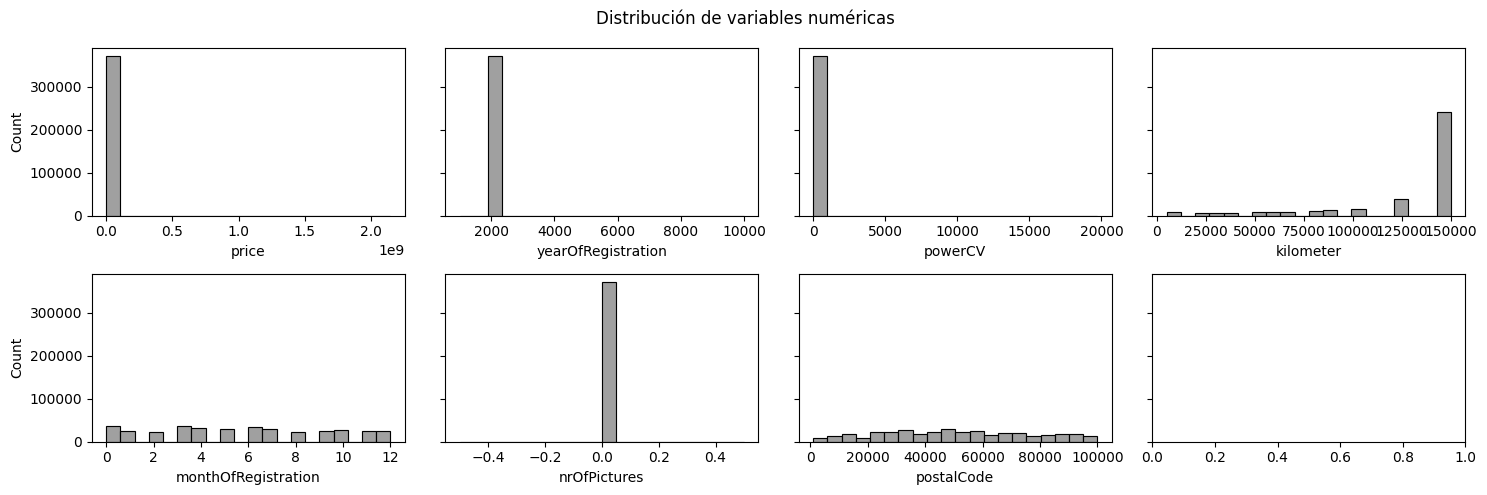

In [6]:
visualizador_todos.plot_numericas()

In [7]:
visualizador_small =sc.Visualizador(df_filtrado)

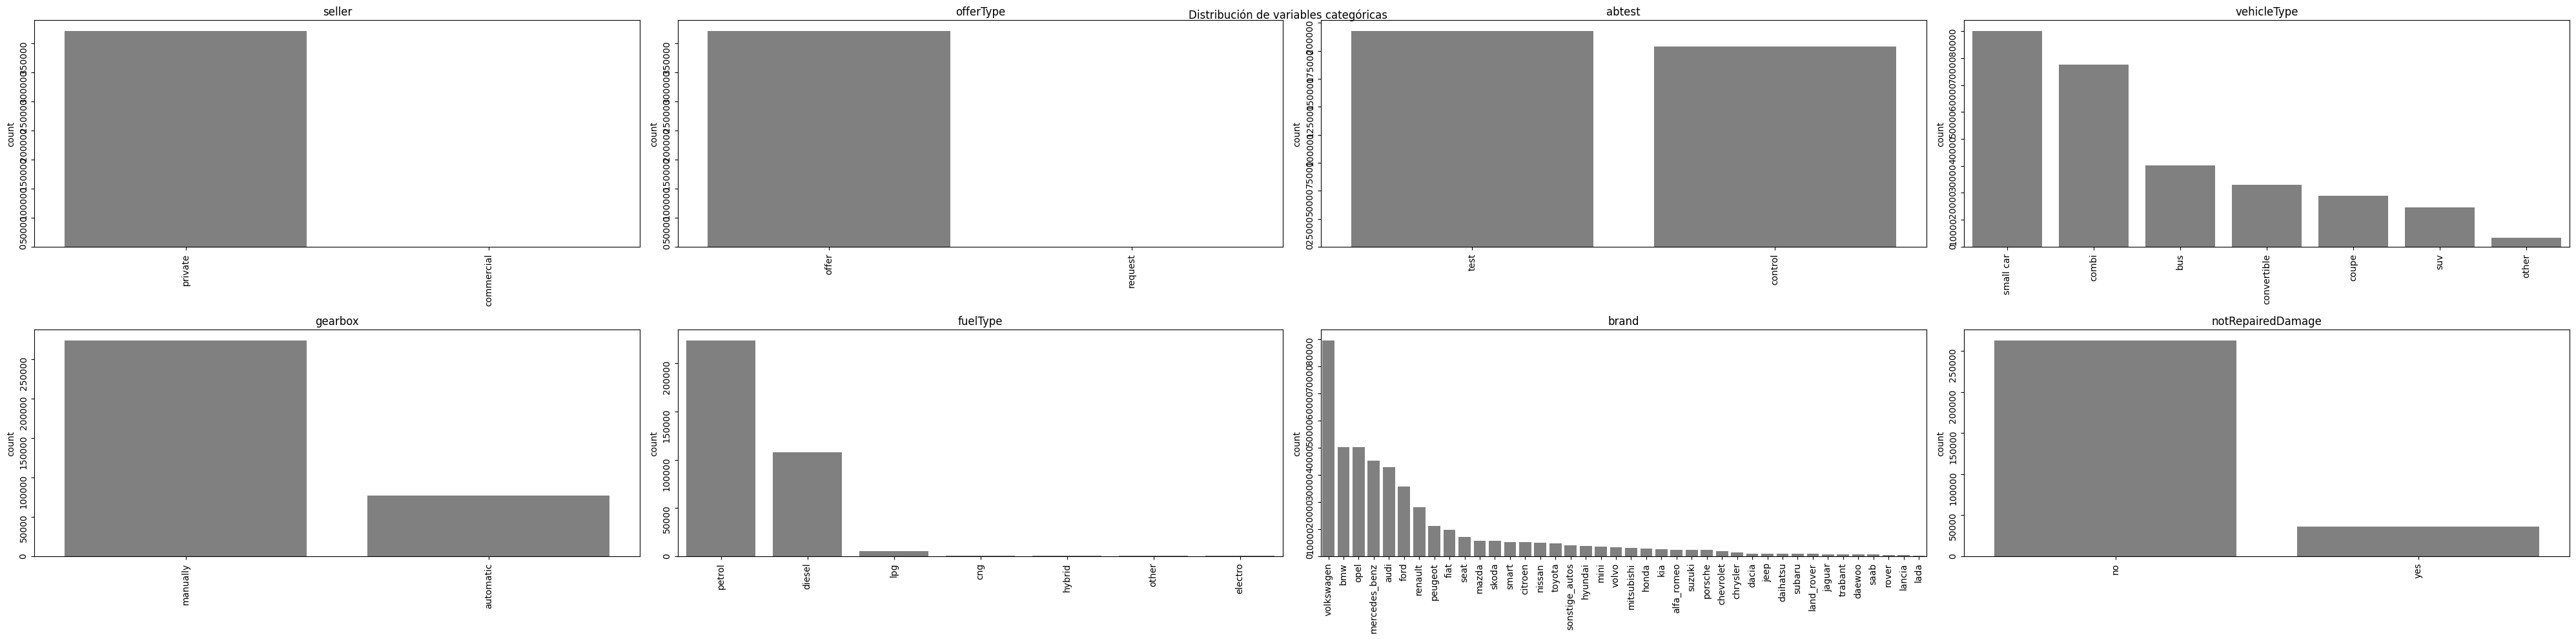

In [8]:
visualizador_small.plot_categoricas()

In [9]:
df_filtrado.columns

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerCV', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'nrOfPictures', 'postalCode'],
      dtype='object')

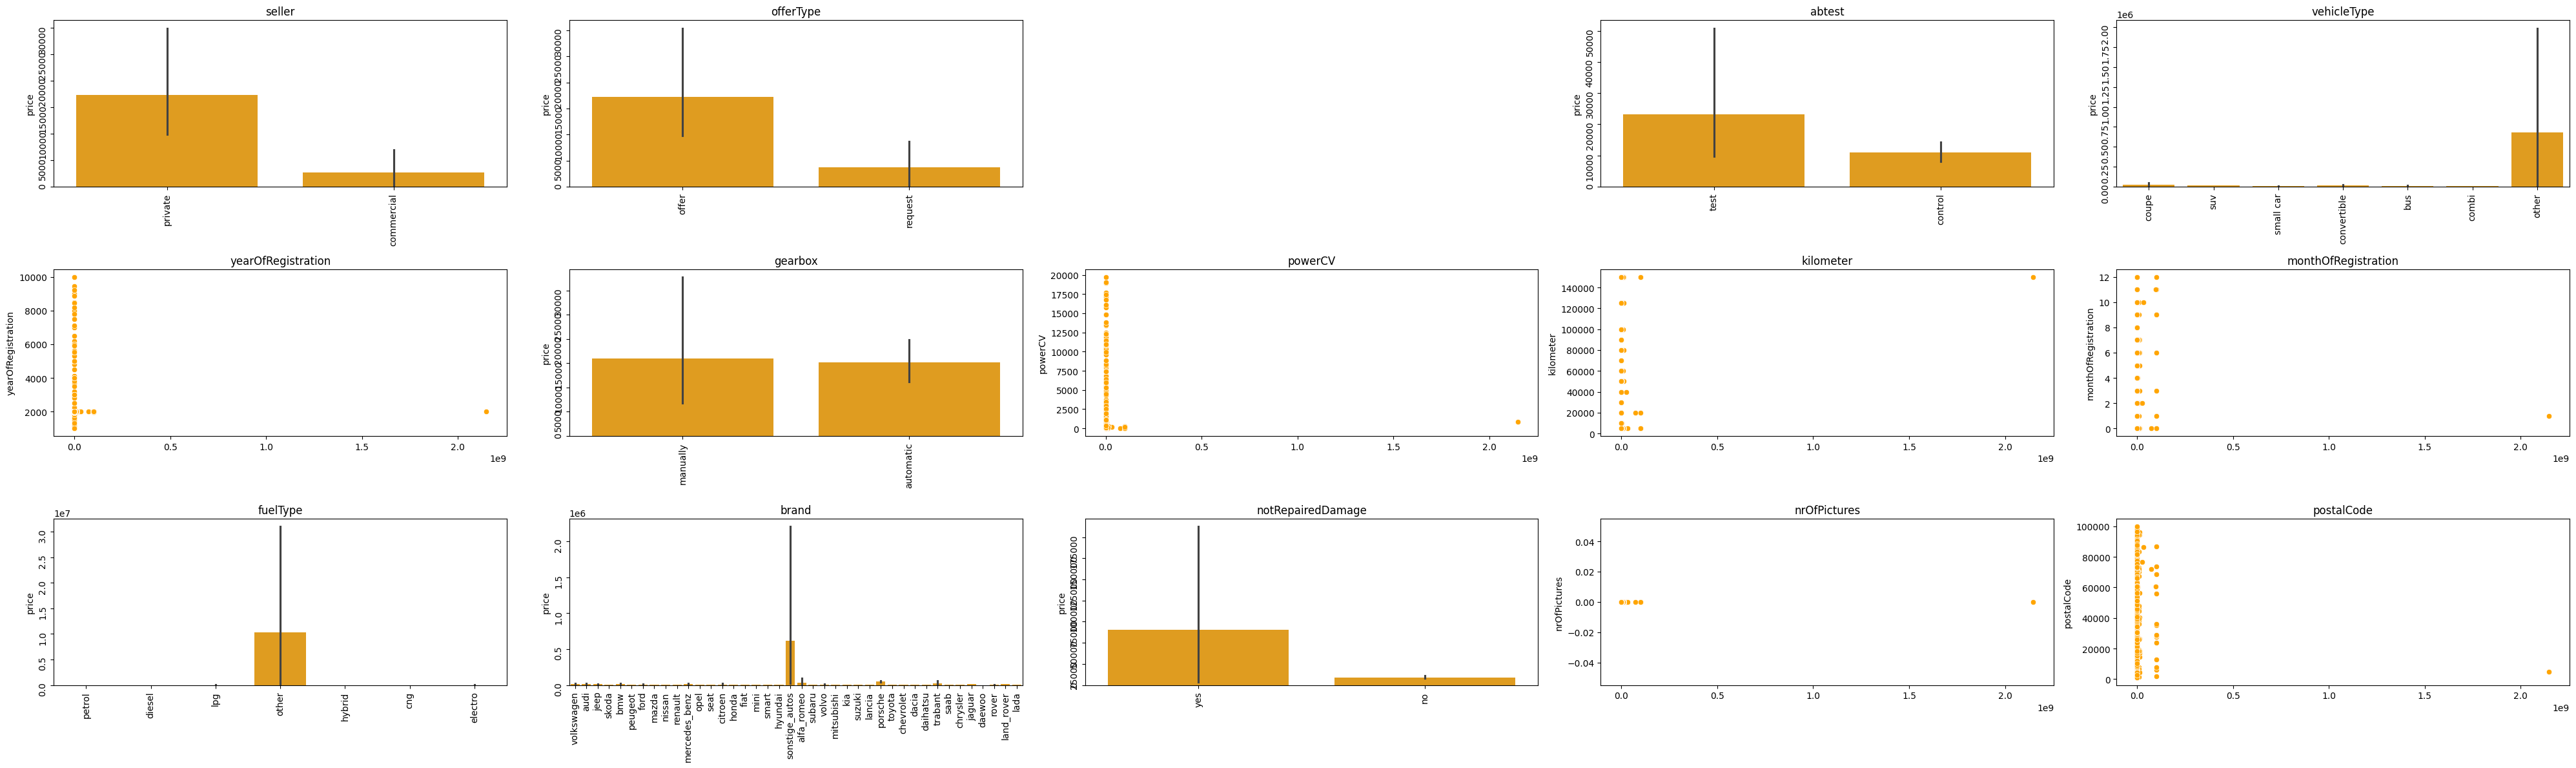

In [10]:
visualizador_small.plot_relacion("price", color = "orange")

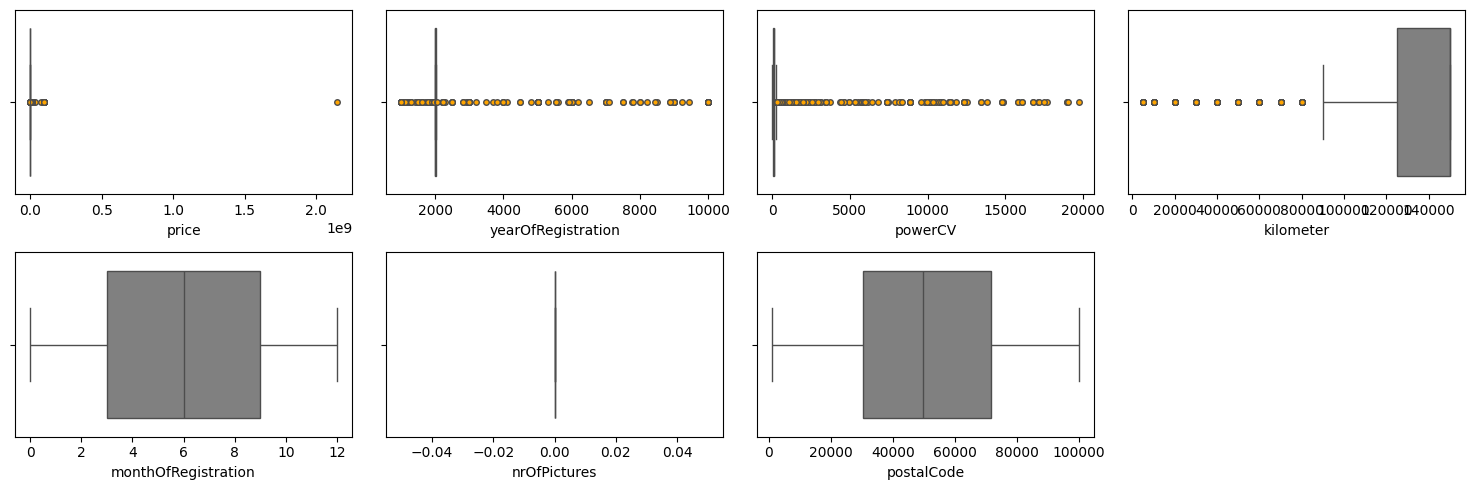

In [11]:
visualizador_small.deteccion_outliers()

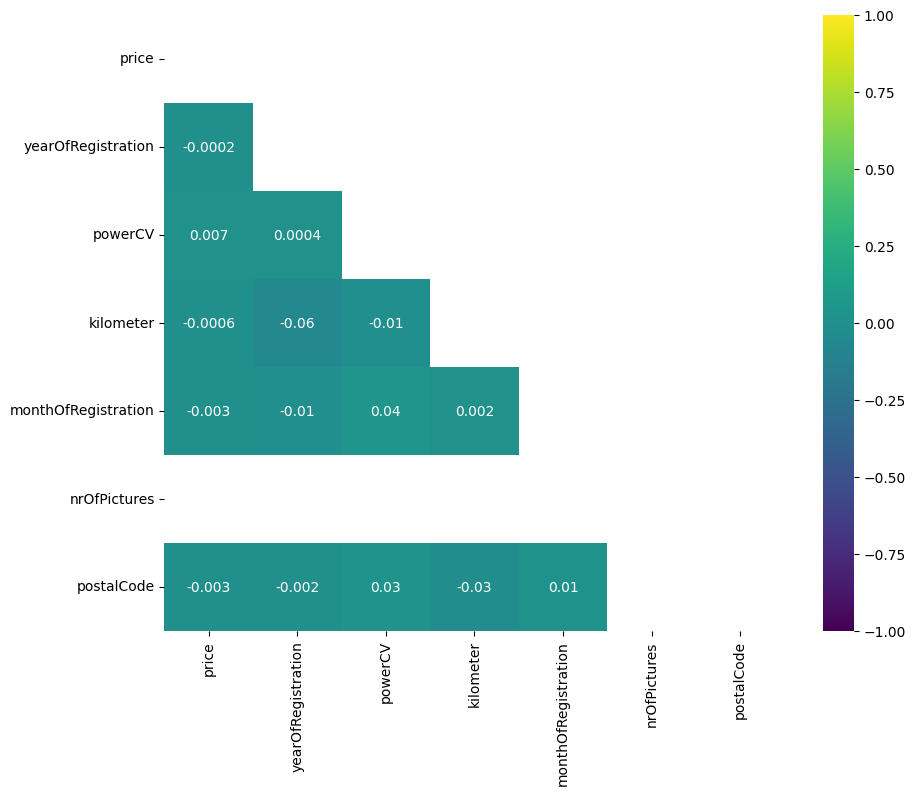

In [12]:
visualizador_small.correlacion(tamano_grafica=(10, 8))

In [13]:
df_duplicados = df[df.duplicated()]

In [14]:
df_duplicados.duplicated().sum()

np.int64(0)

In [15]:
df.columns

Index(['name', 'seller', 'offerType', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerCV', 'model', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen'],
      dtype='object')

In [16]:
df['Month'] = pd.to_datetime(df['dateCreated']).dt.month_name()
df.reset_index(inplace=True)

In [17]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,Month
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manually,0.0,...,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,March
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manually,187.0,...,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,March
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,161.0,...,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,March
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,2001,manually,74.0,...,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,March
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,2008,manually,68.0,...,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,March


In [18]:
visualizador_todos =sc.Visualizador(df)

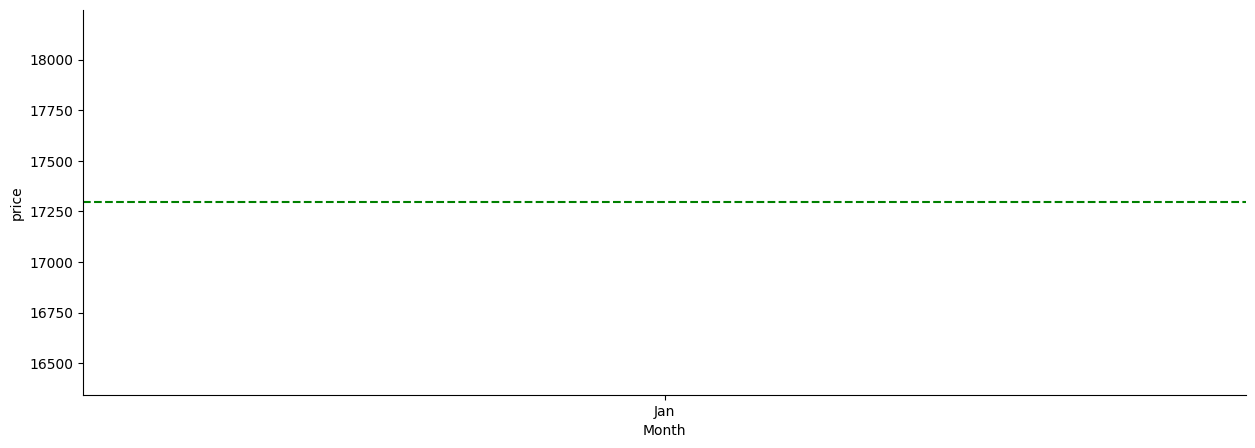

In [19]:
visualizador_todos.analisis_temporal("price", "monthOfRegistration")